### Reading the data and creating the main data frame

In [66]:
import glob
import pandas as pd
import re

# get data file names
path ='names'
filenames = glob.glob(path + "/*.txt")

dfs = []
for filename in filenames:
    df = pd.read_csv(filename, sep=",", header=None, names=["Name", "Gender", "Occurences"])
    yearofBirth = int(re.findall(r'[0-9]+', filename)[0])
    df["Year"] = [yearofBirth]*len(df)
    dfs.append(df)

# Concatenate all data into one DataFrame
babiesDataset = pd.concat(dfs, ignore_index=True)
# big_frame
babiesDataset

,Name,Gender,Occurences,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


### Gender Analysis

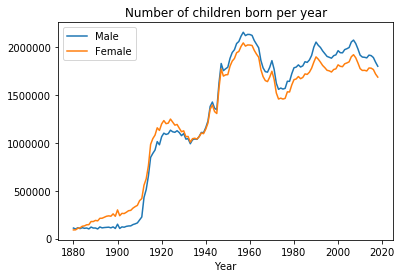

In [67]:
gender_df = babiesDataset.groupby(["Year","Gender"],as_index=False).sum()

import matplotlib.pyplot as plt

ax = plt.gca(title="Number of children born per year")
gender_df[gender_df["Gender"]=="M"].plot(x="Year",ax=ax)
gender_df[gender_df["Gender"]=="F"].plot(x="Year",ax=ax)
ax.legend(["Male", "Female"])

## Male - Most Occuring Names

In [68]:
maleNamesDF=babiesDataset[['Name','Gender','Occurences']]
male_most_names = maleNamesDF[maleNamesDF['Gender'] == 'M'].groupby(['Name']).sum().sort_values(by='Occurences',ascending=False)
male_most_names.head(10)

,Occurences
Name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779


## Female - Most Occuring Names

In [69]:
maleNamesDF=babiesDataset[['Name','Gender','Occurences']]
male_most_names = maleNamesDF[maleNamesDF['Gender'] == 'F'].groupby(['Name']).sum().sort_values(by='Occurences',ascending=False)
male_most_names.head(10)

,Occurences
Name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


### Most Common Unisex Names

In [70]:
# The only possible values for gender are F and M in the dataset
print(babiesDataset["Gender"].unique())

unisexNames = []

for name, nGenders in babiesDataset.groupby(["Name"]).Gender.nunique().iteritems():
    if nGenders > 1:
        unisexNames.append(name)

import random
random.shuffle(unisexNames)
print("Some unisex names:", unisexNames[:50])

unisexNames = set(unisexNames)

['F' 'M']
Some unisex names: ['Terrylee', 'Willy', 'Jadakiss', 'Ally', 'Zoe', 'Currie', 'Ynes', 'Lorian', 'Omni', 'Demarcus', 'Poet', 'Frankye', 'Johnson', 'Denali', 'Sherri', 'Dalin', 'Jubilee', 'Jasiya', 'Sheldyn', 'Shayde', 'Bijon', 'Moriah', 'Izzy', 'Nataly', 'Mira', 'Ignacio', 'Kaedence', 'Taiyari', 'Kolbey', 'Heli', 'Arbor', 'Violeta', 'Ebba', 'Mcclain', 'Ericka', 'Elmi', 'Tary', 'Raydell', 'Merrill', 'Hannon', 'Coty', 'Jacquise', 'Taygen', 'Yichen', 'Beryl', 'Ekin', 'Phung', 'Tegen', 'Nicky', 'Azhar']


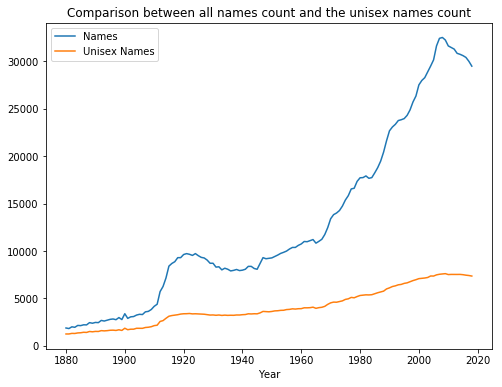

In [71]:
x = []
total = []
unisex = []

for year, group in babiesDataset[["Year","Name"]].groupby("Year"):
    allNames = set(group["Name"].values)
    x.append(year)
    total.append(len(allNames))
    intersection = allNames & unisexNames
    unisex.append(len(intersection))

%matplotlib inline
pd.DataFrame({"Year":x,"Names":total,"Unisex Names": unisex}).plot(x="Year",title="Comparison between all names count and the unisex names count",figsize=(8,6))

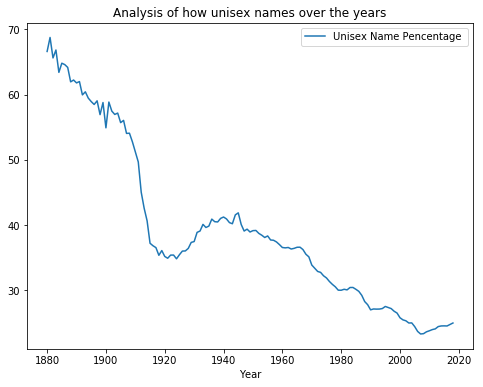

In [72]:
import numpy as np
ratio = 100*np.array(unisex)/np.array(total)
pd.DataFrame({"Year":x,"Unisex Name Pencentage ":ratio}).plot(x="Year",title="Analysis of how unisex names over the years", figsize=(8,6))

## Demography over 10 year period

In [73]:
yearOverYearDF = babiesDataset
yearOverYearDF = babiesDataset.drop(['Name','Gender'],axis=1)

In [74]:
yearBirthsDF = yearOverYearDF.groupby('Year')['Occurences'].sum()

In [75]:
numberofbirthsDF = pd.DataFrame(yearBirthsDF)
numberofbirthsDF.head()

,Occurences
Year,
1880,201484
1881,192696
1882,221533
1883,216944
1884,243461


In [76]:
numberofbirthsDF['Decade']=pd.cut(Year_of_Birth.index, bins=[1879,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
numberofbirthsDF

,Occurences,Decade
Year,,
1880,201484,"(1879, 1890]"
1881,192696,"(1879, 1890]"
1882,221533,"(1879, 1890]"
1883,216944,"(1879, 1890]"
1884,243461,"(1879, 1890]"
1885,240854,"(1879, 1890]"
1886,255318,"(1879, 1890]"
1887,247393,"(1879, 1890]"
1888,299473,"(1879, 1890]"


In [77]:
numberofbirthsDF.groupby('Decade')['Occurences'].sum().sort_values(ascending=False)

Decade
(1950, 1960]    40094155
(2000, 2010]    38324214
(1990, 2000]    37302958
(1960, 1970]    36980451
(1980, 1990]    36136942
(1970, 1980]    31812172
(1940, 1950]    30569912
(2010, 2020]    29042670
(1920, 1930]    22932739
(1930, 1940]    21306759
(1910, 1920]    16503535
(1900, 1910]     4425621
(1890, 1900]     3511394
(1879, 1890]     2709503
Name: Occurences, dtype: int64

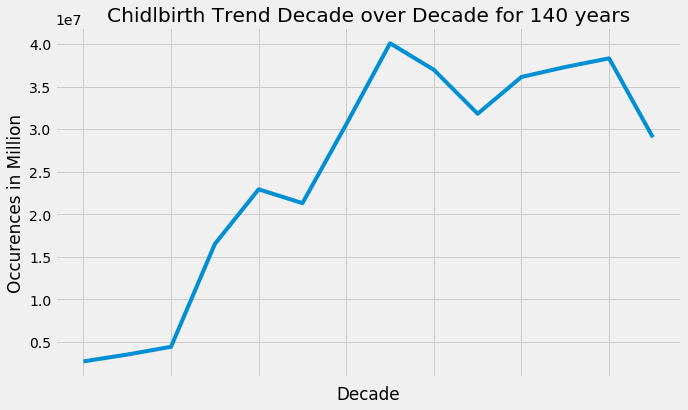

In [101]:
with plt.style.context("fivethirtyeight"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
    numberofbirthsDF.groupby('Decade')['Occurences'].sum().plot(figsize=(10,6),ax=axes)
    plt.title("Chidlbirth Trend Decade over Decade for 140 years")
    plt.ylabel('Occurences in Million');

## Analysis and Data Sampling for Predicting number of children to be born in 2019

In [79]:
babiesDataset.groupby('Year',as_index=False).sum()
babiesDataset.head()

,Name,Gender,Occurences,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [80]:
import numpy as np
new_born_df = babiesDataset.groupby("Year",as_index=False).sum()

X = np.array(new_born_df["Year"]).reshape(-1, 1) 
y = np.array(new_born_df["Occurences"]).reshape(-1, 1) 

In [81]:
new_born_df.sum().isna()

Year          False
Occurences    False
dtype: bool

In [82]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [83]:
model = linear_model.LinearRegression(normalize=True,n_jobs=-1,fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
model.score(X_test, y_test)

0.7299908967874215

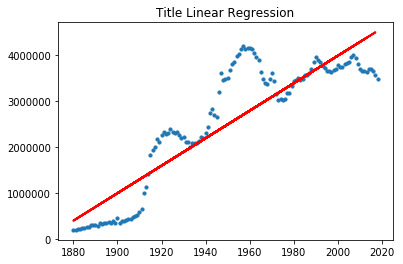

In [85]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)
plt.plot(X_test, y_pred, color='r',linewidth=2)
plt.title("Title Linear Regression")
plt.show()

## Check the Actual and Predicted values -Randomly selected over the years

In [86]:
#convert 2D array to 1D
y_test = y_test.ravel()
y_pred = y_pred.ravel()

In [87]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df = df.head(30)

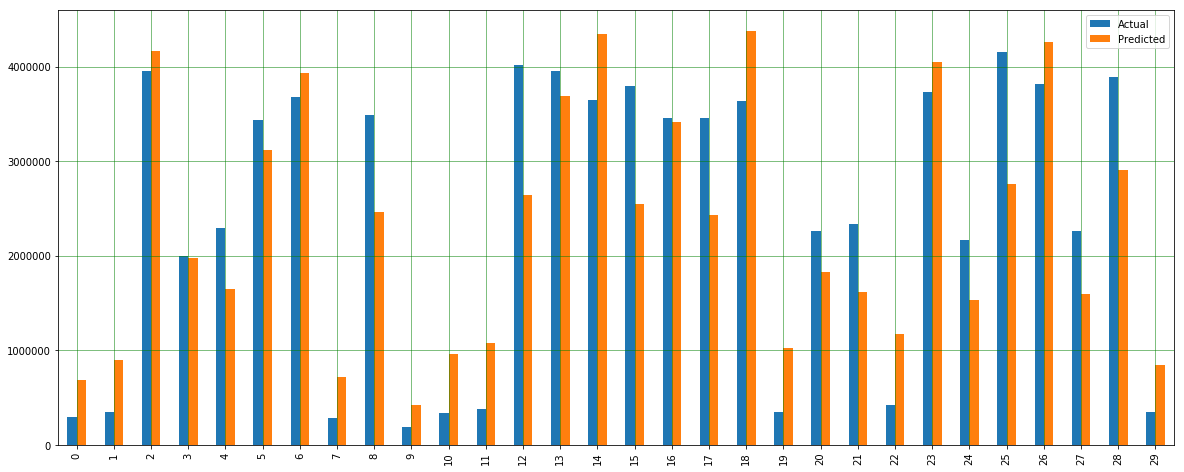

In [88]:
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Running statistical tests")
print("RMSE:",round(rmse,2))

Running statistical tests
RMSE: 762458.69


### Number of children predicted be born in the year 2019

In [102]:
print("The prediction for 2019 is {} newborns".format(int(model.predict([[2019]]))))

The prediction for 2019 is 4557228 newborns


## Analysis and Data Preprocessing for building model for predicting number of individuals who will share the same name next year.

To predict the most likely names for the next year, I will develop a regression model which predicts the number of people with some specific name based on the number of people with that name on previous years.

For example if some name has these frequencies:

2016: 124

2017: 98

2018: 52


then we would expect 100 of less people with this name.

Based on this model, we will predict the frequency of each name for the next year, then using those predictions we will find out the predicted top 10 most frequent names for 2019

In [103]:
names = babiesDataset.groupby("Name")

occurence_per_year = []
for name, group in names:
    # I append frequency data of each name
    # I will end up using only the last years
    occurence_per_year.append(group[["Occurences","Year"]].values) 

In [93]:
y = [] # Last year count
x = [] # Count of the previous 4 years

for value in occurence_per_year:
    sorted_by_year_values = sorted(list(map(list,value)),key=lambda x : x[1]) # Sorting values by year
    sorted_by_year_values = list(map(lambda x: x[0], sorted_by_year_values)) # Discarding the year and keeping only the frequency
    for i in range(4,len(sorted_by_year_values)):
        last_year_count = sorted_by_year_values[i]
        y.append(last_year_count)
        
        previous_4_years = sorted_by_year_values[i-4:i]
        x.append(previous_4_years)

x = np.array(x).reshape(-1,4)
y = np.array(y).reshape(-1,1)

### For the first loop I iterate over each name data. 
### Then on the second loop for each name data I prepare a dataset to try to predict the names for next year based on the previous 4 years

### For example I try to predict the frequency in 2015 based on the frequencies on 2011, 2012, 2013 and 2014

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
regr.fit(X_train[:100000], y_train[:100000])

C:\Users\Bibhudutta Moharana\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
print("Example prediction:")
last_years_frequencies = [100,400,300,100]
print("Assuming that for some name the last 4 years frequencies are {} then the predicted number of children next year will be {}".format(last_years_frequencies, int(regr.predict([last_years_frequencies])[0])))

Example prediction:
Assuming that for some name the last 4 years frequencies are [100, 400, 300, 100] then the predicted number of children next year will be 280


In [96]:
print("Running statistical the R^2 score gets {}".format(round(regr.score(X_test,y_test),2)))

Running statistical the R^2 score gets 0.98


In [97]:
recentNames = babiesDataset[babiesDataset["Year"] > 2014].groupby("Name")

### Below I have predicted for each name the next year frequency based on the last 4 years

In [98]:
# Creating dataset of names and its last years frequencies

names_recent_freq = {}

for name, group in recentNames:
    value = group[["Occurences","Year"]].values
    sorted_by_year_values = sorted(list(map(list,value)),key=lambda x : x[1]) # Sorting values by year
    sorted_by_year_values = list(map(lambda x: x[0], sorted_by_year_values)) # Discarding the years, keeping only the frequency value

    if len(sorted_by_year_values) >= 4:
        names_recent_freq[name] = regr.predict([sorted_by_year_values[-4:]])

### Below I have printed the top most frequent names

In [99]:
print("Top Names")
i = 0

names_recent_freq_list = list(names_recent_freq.items()) # Convert dictionary into list
sorted_names = sorted(names_recent_freq_list,key=lambda x : x[1], reverse=True) # Sort list by frequency (From most frequent to least frequent)

for name, freq in sorted_names[:50]:
    i+=1
    print("{}. {} children are predicted to be named {} next year.".format(i,int(freq[0]),name))

Top Names
1. 18543 children are predicted to be named Emma next year.
2. 17538 children are predicted to be named Olivia next year.
3. 13743 children are predicted to be named Sophia next year.
4. 13734 children are predicted to be named Ava next year.
5. 13658 children are predicted to be named Isabella next year.
6. 12457 children are predicted to be named Amelia next year.
7. 12388 children are predicted to be named Mia next year.
8. 12339 children are predicted to be named Charlotte next year.
9. 10551 children are predicted to be named Harper next year.
10. 9678 children are predicted to be named Evelyn next year.
11. 9600 children are predicted to be named Abigail next year.
12. 8504 children are predicted to be named Mila next year.
13. 8481 children are predicted to be named Joshua next year.
14. 8463 children are predicted to be named Emily next year.
15. 8026 children are predicted to be named Scarlett next year.
16. 8015 children are predicted to be named Avery next year.
17

## Thank You